In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Compare sampling methods

In [2]:
Linear = np.load('Linear_macro_f1_list_ogbn_arxiv_random_ratio1.0.npy')
Sage = np.load('GraphSage_accuracy_list_ogbn_arxiv.npy')
Sage_random_10 = np.load('GraphSage_accuracy_list_ogbn_arxiv_random_ratio0.05.npy')
Sage_laplacian_10 = np.load('GraphSage_accuracy_list_ogbn_arxiv_laplacian_ratio0.05.npy')
Sage_degree_10 = np.load('GraphSage_accuracy_list_ogbn_arxiv_degree_ratio0.05.npy')
num_batch = int(90941/256+1)

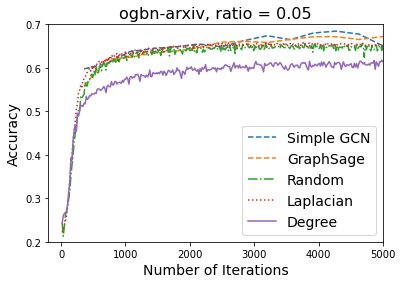

In [3]:
plt.plot(np.arange(1, len(Linear)+1)*num_batch, Linear, linestyle = '--', label = 'Simple GCN')
plt.plot(np.arange(1, len(Sage)+1)*num_batch, Sage, linestyle = '--', label = 'GraphSage')
plt.plot(np.arange(1, len(Sage_random_10)+1)*int(num_batch*0.05), Sage_random_10, linestyle = '-.', label = 'Random')
plt.plot(np.arange(1, len(Sage_laplacian_10)+1)*int(num_batch*0.05), Sage_laplacian_10, linestyle = ':', label = 'Laplacian')
plt.plot(np.arange(1, len(Sage_degree_10)+1)*int(num_batch*0.05), Sage_degree_10, linestyle = '-', label = 'Degree')

plt.title('ogbn-arxiv, ratio = 0.05', fontsize = 16)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim([0.2, 0.7])
plt.xlim([-200,5000])
# plt.savefig('../Figure/Reddit_accuracy_active_sampling_method_comparison_ratio_0.2.png')
plt.show()

In [2]:
Sage = np.load('GraphSage_accuracy_list_ogbn_arxiv.npy')
Sage_random = np.load('GraphSage_accuracy_list_ogbn_arxiv_random_ratio0.01.npy')
Sage_laplacian = np.load('GraphSage_accuracy_list_ogbn_arxiv_laplacian_ratio0.01.npy')
Sage_degree = np.load('GraphSage_accuracy_list_ogbn_arxiv_degree_ratio0.01.npy')
num_batch = int(90941/256+1)

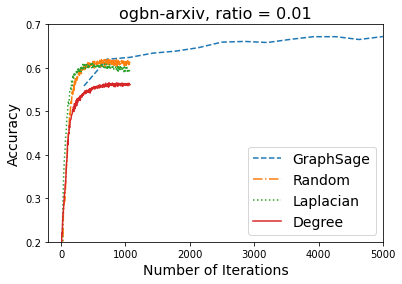

In [26]:
plt.plot(np.arange(1, len(Sage)+1)*num_batch, Sage, linestyle = '--', label = 'GraphSage')
plt.plot(np.arange(1, len(Sage_random)+1)*num_batch*0.01, Sage_random, linestyle = '-.', label = 'Random')
plt.plot(np.arange(1, len(Sage_laplacian)+1)*num_batch*0.01, Sage_laplacian, linestyle = ':', label = 'Laplacian')
plt.plot(np.arange(1, len(Sage_degree)+1)*num_batch*0.01, Sage_degree, linestyle = '-', label = 'Degree')

plt.title('ogbn-arxiv, ratio = 0.01', fontsize = 16)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim([0.2, 0.7])
plt.xlim([-200,5000])
# plt.savefig('../Figure/Reddit_accuracy_active_sampling_method_comparison_ratio_0.2.png')
plt.show()

## Cross Entropy

In [29]:
Sage = np.load('GraphSage_accuracy_list_ogbn_arxiv.npy')[0:25]
Sage_random_05 = np.load('GraphSage_accuracy_list_ogbn_arxiv_random_ratio0.05.npy')
Sage_uncertain_05 = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_uncertain_epochs300_pretrain10_ratio0.05_sample_freq20.npy')
Sage_uncertain_incre_05 = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_uncertain_increment_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')
Sage_uncertain_kick = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_uncertain_kick_out_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')

num_batch = int(90941/256+1)

samples_count = np.load('Sample_count_list_ogbn_arxiv_active_random_uncertain_increment_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')
samples_cumsum = np.cumsum(samples_count)
num_batch_uncertain = [x/256 for x in samples_cumsum]

samples_count_kick = np.load('Sample_count_list_ogbn_arxiv_active_random_uncertain_kick_out_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')
samples_cumsum_kick = np.cumsum(samples_count_kick)
num_batch_uncertain_kick = [x/256 for x in samples_cumsum_kick]

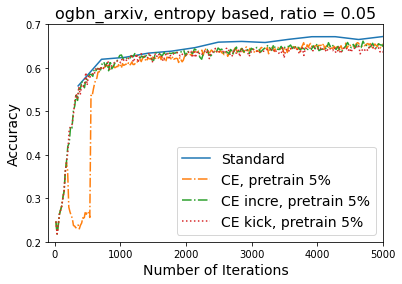

In [15]:
plt.plot(np.arange(1, len(Sage)+1)*num_batch, Sage, label = 'Standard')
# plt.plot(np.arange(1, len(Sage_random_05)+1)*int(num_batch*0.05), Sage_random_05, linestyle = '-.', label = 'Random')
# plt.plot(np.arange(1, len(Sage_laplacian_05)+1)*num_batch*0.05, Sage_laplacian_05, linestyle = '--', label = 'Laplacian, 5%')
plt.plot(np.arange(1, len(Sage_uncertain_05)+1)*num_batch*0.05, Sage_uncertain_05, linestyle = '-.', label = 'CE, pretrain 5%')
plt.plot(num_batch_uncertain, Sage_uncertain_incre_05, linestyle = '-.', label = 'CE incre, pretrain 5%')
plt.plot(num_batch_uncertain_kick, Sage_uncertain_kick, linestyle = ':', label = 'CE kick, pretrain 5%')


plt.title('ogbn_arxiv, entropy based, ratio = 0.05', fontsize = 16)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim([0.2, 0.7])
plt.xlim([-100, 5000])
# plt.xscale('log')
# plt.savefig('../Figure/Pubmed_accuracy_active_uncertainty_matching_comparison_ratio_0.05.png')
plt.show()

In [27]:
Sage = np.load('GraphSage_accuracy_list_ogbn_arxiv.npy')[0:25]
Sage_random = np.load('GraphSage_accuracy_list_ogbn_arxiv_random_ratio0.01.npy')
# Sage_uncertain = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_uncertain_epochs300_pretrain10_ratio0.01_sample_freq20.npy')
Sage_uncertain_incre = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_uncertain_increment_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')
Sage_uncertain_kick = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_uncertain_kick_out_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')

num_batch = int(90941/256+1)

samples_count = np.load('Sample_count_list_ogbn_arxiv_active_random_uncertain_increment_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')
samples_cumsum = np.cumsum(samples_count)
num_batch_uncertain = [x/256 for x in samples_cumsum]

samples_count_kick = np.load('Sample_count_list_ogbn_arxiv_active_random_uncertain_kick_out_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')
samples_cumsum_kick = np.cumsum(samples_count_kick)
num_batch_uncertain_kick = [x/256 for x in samples_cumsum_kick]

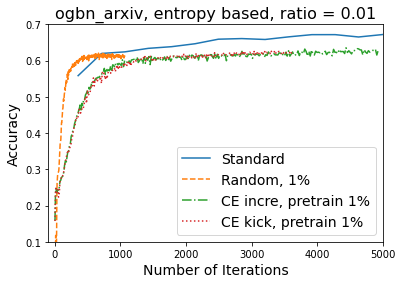

In [28]:
plt.plot(np.arange(1, len(Sage)+1)*num_batch, Sage, label = 'Standard')
plt.plot(np.arange(1, len(Sage_laplacian)+1)*num_batch*0.01, Sage_random, linestyle = '--', label = 'Random, 1%')
# plt.plot(np.arange(1, len(Sage_uncertain_05)+1)*num_batch*0.05, Sage_uncertain, linestyle = '-.', label = 'CE, pretrain 5%')
plt.plot(num_batch_uncertain, Sage_uncertain_incre, linestyle = '-.', label = 'CE incre, pretrain 1%')
plt.plot(num_batch_uncertain_kick, Sage_uncertain_kick, linestyle = ':', label = 'CE kick, pretrain 1%')


plt.title('ogbn_arxiv, entropy based, ratio = 0.01', fontsize = 16)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim([0.1, 0.7])
plt.xlim([-100, 5000])
# plt.xscale('log')
# plt.savefig('../Figure/Pubmed_accuracy_active_uncertainty_matching_comparison_ratio_0.05.png')
plt.show()

## EL2N

In [30]:
Sage = np.load('GraphSage_accuracy_list_ogbn_arxiv.npy')[0:25]
Sage_random_05 = np.load('GraphSage_accuracy_list_ogbn_arxiv_random_ratio0.05.npy')
Sage_EL2N_incre_05 = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_EL2N_increment_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')
Sage_EL2N_kick = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_EL2N_kick_out_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')

num_batch = int(90941/256+1)

samples_count = np.load('Sample_count_list_ogbn_arxiv_active_random_EL2N_increment_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')
samples_cumsum = np.cumsum(samples_count)
num_batch_uncertain = [x/256 for x in samples_cumsum]

samples_count_kick = np.load('Sample_count_list_ogbn_arxiv_active_random_EL2N_kick_out_pretrain10_epochs300_pretrain_ratio0.05_ratio0.01_sample_freq20.npy')
samples_cumsum_kick = np.cumsum(samples_count_kick)
num_batch_uncertain_kick = [x/256 for x in samples_cumsum_kick]

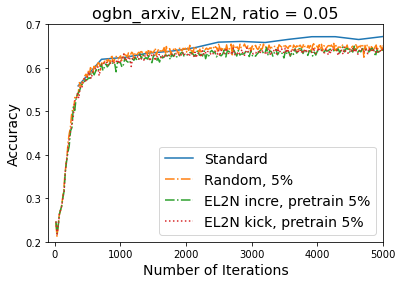

In [31]:
plt.plot(np.arange(1, len(Sage)+1)*num_batch, Sage, label = 'Standard')
plt.plot(np.arange(1, len(Sage_random_05)+1)*int(num_batch*0.05), Sage_random_05, linestyle = '-.', label = 'Random, 5%')
plt.plot(num_batch_uncertain, Sage_EL2N_incre_05, linestyle = '-.', label = 'EL2N incre, pretrain 5%')
plt.plot(num_batch_uncertain_kick, Sage_EL2N_kick, linestyle = ':', label = 'EL2N kick, pretrain 5%')


plt.title('ogbn_arxiv, EL2N, ratio = 0.05', fontsize = 16)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim([0.2, 0.7])
plt.xlim([-100, 5000])
# plt.xscale('log')
# plt.savefig('../Figure/Pubmed_accuracy_active_uncertainty_matching_comparison_ratio_0.05.png')
plt.show()

In [37]:
Sage = np.load('GraphSage_accuracy_list_ogbn_arxiv.npy')[0:25]
Sage_random = np.load('GraphSage_accuracy_list_ogbn_arxiv_random_ratio0.01.npy')
Sage_EL2N_incre = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_EL2N_increment_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')
Sage_EL2N_kick = np.load('GraphSage_accuracy_list_ogbn_arxiv_active_random_EL2N_kick_out_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')

num_batch = int(90941/256+1)

samples_count = np.load('Sample_count_list_ogbn_arxiv_active_random_EL2N_increment_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')
samples_cumsum = np.cumsum(samples_count)
num_batch_uncertain = [x/256 for x in samples_cumsum]

samples_count_kick = np.load('Sample_count_list_ogbn_arxiv_active_random_EL2N_kick_out_pretrain10_epochs300_pretrain_ratio0.01_ratio0.01_sample_freq20.npy')
samples_cumsum_kick = np.cumsum(samples_count_kick)
num_batch_uncertain_kick = [x/256 for x in samples_cumsum_kick]

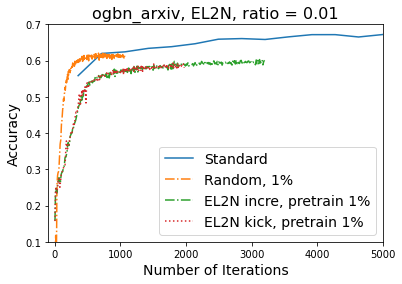

In [39]:
plt.plot(np.arange(1, len(Sage)+1)*num_batch, Sage, label = 'Standard')
plt.plot(np.arange(1, len(Sage_random)+1)*num_batch*0.01, Sage_random, linestyle = '-.', label = 'Random, 1%')
plt.plot(num_batch_uncertain, Sage_EL2N_incre, linestyle = '-.', label = 'EL2N incre, pretrain 1%')
plt.plot(num_batch_uncertain_kick, Sage_EL2N_kick, linestyle = ':', label = 'EL2N kick, pretrain 1%')


plt.title('ogbn_arxiv, EL2N, ratio = 0.01', fontsize = 16)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim([0.1, 0.7])
plt.xlim([-100, 5000])
# plt.xscale('log')
# plt.savefig('../Figure/Pubmed_accuracy_active_uncertainty_matching_comparison_ratio_0.05.png')
plt.show()